In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as splt
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [ ]:
data=pd.read_csv(r"C:\Users\elham\OneDrive\Desktop\IT project\Data analyst and scientist projects\Weather prediction\weather_data.csv")

In [ ]:
data.head(2)

In [89]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 794 entries, 0 to 799
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Location          794 non-null    object 
 1   Temperature (°C)  794 non-null    float64
 2   Feels Like (°C)   794 non-null    float64
 3   Humidity (%)      794 non-null    float64
 4   Wind Speed (kph)  794 non-null    float64
 5   Cloud Cover (%)   794 non-null    int64  
 6   Pressure (mb)     794 non-null    float64
 7   UV Index          794 non-null    int64  
 8   Visibility (km)   794 non-null    int64  
 9   Location_index    794 non-null    int8   
dtypes: float64(5), int64(3), int8(1), object(1)
memory usage: 95.1+ KB


In [90]:
len(data)

794

In [91]:
data=data.dropna()

In [92]:
len(data)

794

In [93]:
data.describe()

,Temperature (°C),Feels Like (°C),Humidity (%),Wind Speed (kph),Cloud Cover (%),Pressure (mb),UV Index,Visibility (km),Location_index
count,794.000000,794.000000,794.000000,794.000000,794.000000,794.000000,794.000000,794.000000,794.000000
mean,16.580730,16.373804,73.513854,16.123300,43.513854,1013.041562,1.746851,10.732997,3.501259
std,5.574821,7.382814,16.478897,10.338986,34.845115,7.608453,1.092285,1.966105,2.296579
min,8.300000,4.500000,40.000000,3.600000,0.000000,900.000000,1.000000,10.000000,0.000000
25%,15.000000,13.800000,67.000000,6.100000,0.000000,1012.000000,1.000000,10.000000,1.000000
50%,16.000000,16.000000,76.000000,9.000000,50.000000,1013.000000,1.000000,10.000000,4.000000
75%,24.000000,25.500000,88.000000,24.100000,75.000000,1019.250000,2.000000,10.000000,5.750000
max,25.000000,27.800000,100.000000,29.900000,75.000000,1024.000000,4.000000,16.000000,7.000000


In [94]:
data.columns

Index(['Location', 'Temperature (°C)', 'Feels Like (°C)', 'Humidity (%)',
       'Wind Speed (kph)', 'Cloud Cover (%)', 'Pressure (mb)', 'UV Index',
       'Visibility (km)', 'Location_index'],
      dtype='object')

# String Indexing

In [95]:
data['Location_index']=data['Location'].astype('category').cat.codes
data.head(2)

,Location,Temperature (°C),Feels Like (°C),Humidity (%),Wind Speed (kph),Cloud Cover (%),Pressure (mb),UV Index,Visibility (km),Location_index
0,New York,8.3,4.5,40.0,29.9,75,1003.0,2,16,3
1,New York,8.3,4.5,40.0,29.9,75,1003.0,2,16,3


In [96]:
# Create a new DataFrame with both columns
unique_location=data['Location'].drop_duplicates().reset_index(drop=True)
unique_Location_index=data['Location_index'].drop_duplicates().reset_index(drop=True)
unique_df=pd.DataFrame({"unique_location":unique_location,"unique_Location_index":unique_Location_index})
unique_df

,unique_location,unique_Location_index
0,New York,3
1,London,2
2,Tokyo,7
3,Paris,4
4,Sydney,6
5,Dubai,0
6,Rome,5
7,Hong Kong,1


In [97]:
list(unique_location)

['New York',
 'London',
 'Tokyo',
 'Paris',
 'Sydney',
 'Dubai',
 'Rome',
 'Hong Kong']

In [98]:
X=data.drop(['Location','Temperature (°C)'],axis=1)
Y=data['Temperature (°C)']
X.columns

Index(['Feels Like (°C)', 'Humidity (%)', 'Wind Speed (kph)',
       'Cloud Cover (%)', 'Pressure (mb)', 'UV Index', 'Visibility (km)',
       'Location_index'],
      dtype='object')

In [99]:
len(X)

794

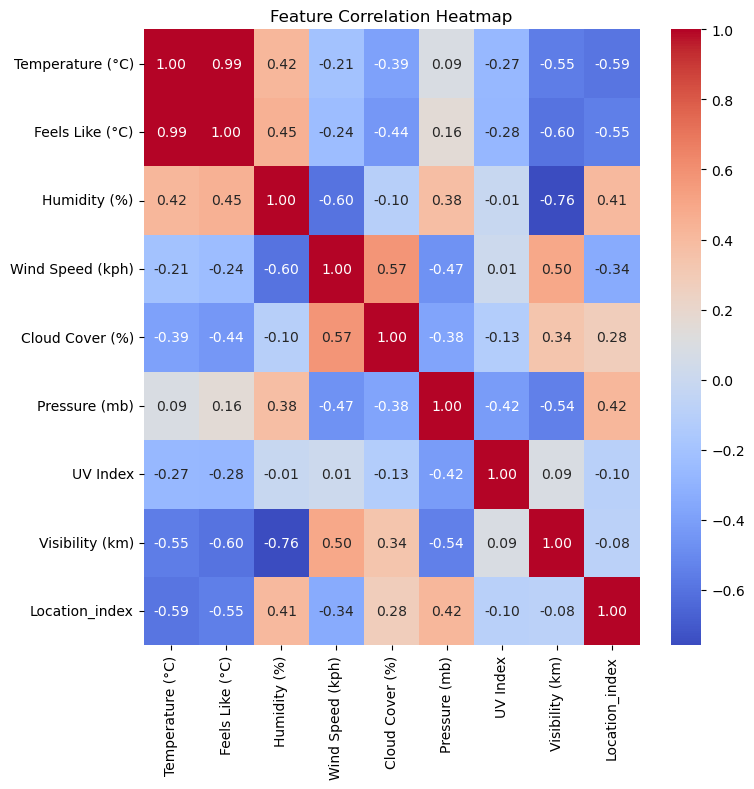

In [100]:
# Select numeric columns
col_numeric=data.select_dtypes(include='number').columns
col_numeric

col_numeric_corr=data[col_numeric].corr()
import matplotlib.pyplot as plt
import seaborn as sns 
plt.figure(figsize=(8,8))
sns.heatmap(col_numeric_corr,annot=True,fmt='.2f',cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.show()

# Feature selection

In [101]:
from sklearn.feature_selection import SelectKBest,f_regression
# Select top 5 features
selector=SelectKBest(score_func=f_regression,k=5)
New_x=selector.fit_transform(X,Y)
# Get the selected feature names
selected_features = X.columns[selector.get_support()]
print("Selected features:", list(selected_features))


Selected features: ['Feels Like (°C)', 'Humidity (%)', 'Cloud Cover (%)', 'Visibility (km)', 'Location_index']


In [102]:
X_selected_feature=data[selected_features]
X_selected_feature.head(2)

,Feels Like (°C),Humidity (%),Cloud Cover (%),Visibility (km),Location_index
0,4.5,40.0,75,16,3
1,4.5,40.0,75,16,3


In [103]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X_selected_feature,Y)

# Scaling:

In [104]:
from sklearn.preprocessing import RobustScaler
scaler=RobustScaler()
X_train_scaled =scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)
print(X_train_scaled)

[[ 0.88990826 -0.66666667 -1.          0.         -1.        ]
 [ 1.10091743  0.18181818 -0.33333333  0.         -0.75      ]
 [ 0.29357798  1.45454545  0.          0.          0.5       ]
 ...
 [ 0.         -0.24242424 -1.          0.          0.25      ]
 [ 0.         -0.24242424 -1.          0.          0.25      ]
 [ 0.29357798  1.45454545  0.          0.          0.5       ]]


In [105]:
df_scaled = pd.DataFrame(X_train_scaled, columns=X_selected_feature.columns)
print(df_scaled.describe())

       Feels Like (°C)  Humidity (%)  Cloud Cover (%)  Visibility (km)  \
count       595.000000    595.000000       595.000000       595.000000   
mean          0.034446     -0.159206        -0.408403         0.766387   
std           0.680575      1.007407         0.462556         2.004426   
min          -1.036697     -2.181818        -1.000000         0.000000   
25%          -0.706422     -0.545455        -1.000000         0.000000   
50%           0.000000      0.000000         0.000000         0.000000   
75%           0.293578      0.454545         0.000000         0.000000   
max           1.100917      1.454545         0.000000         6.000000   

       Location_index  
count      595.000000  
mean        -0.115126  
std          0.572208  
min         -1.000000  
25%         -0.500000  
50%          0.000000  
75%          0.500000  
max          0.750000  


In [106]:
df_scaled.head(2)

,Feels Like (°C),Humidity (%),Cloud Cover (%),Visibility (km),Location_index
0,0.889908,-0.666667,-1.000000,0.0,-1.00
1,1.100917,0.181818,-0.333333,0.0,-0.75


# Train Linear Regression Model['Regression', 'Lasso', 'Ridge']

In [107]:
#'Regression', 'Lasso', 'Ridge'
from sklearn.linear_model import Lasso,Ridge


score={}
# Define models
models = {
    "model_reg": LinearRegression(),
    "model_ridge": Ridge(alpha=1.0),
    "model_lasso": Lasso(alpha=0.1),
}

for name, model in models.items():
    model.fit(X_train_scaled ,Y_train)
    y_predict=model.predict(X_test_scaled)
    
    MSE=mean_squared_error(Y_test,y_predict)
    MAE=mean_absolute_error(Y_test,y_predict)
    rs=r2_score(Y_test,y_predict)
    
    score[name] = {"Mean Squared error":MSE,"Mean Absolute error":MAE,"R2 Score":rs}
    
    

In [114]:
#Convert results to DataFrame and display

results_df = pd.DataFrame(score).T


print(results_df)

             Mean Squared error  Mean Absolute error  R2 Score
model_reg              0.124095             0.279216  0.995899
model_ridge            0.126832             0.291850  0.995808
model_lasso            0.293782             0.427275  0.990291


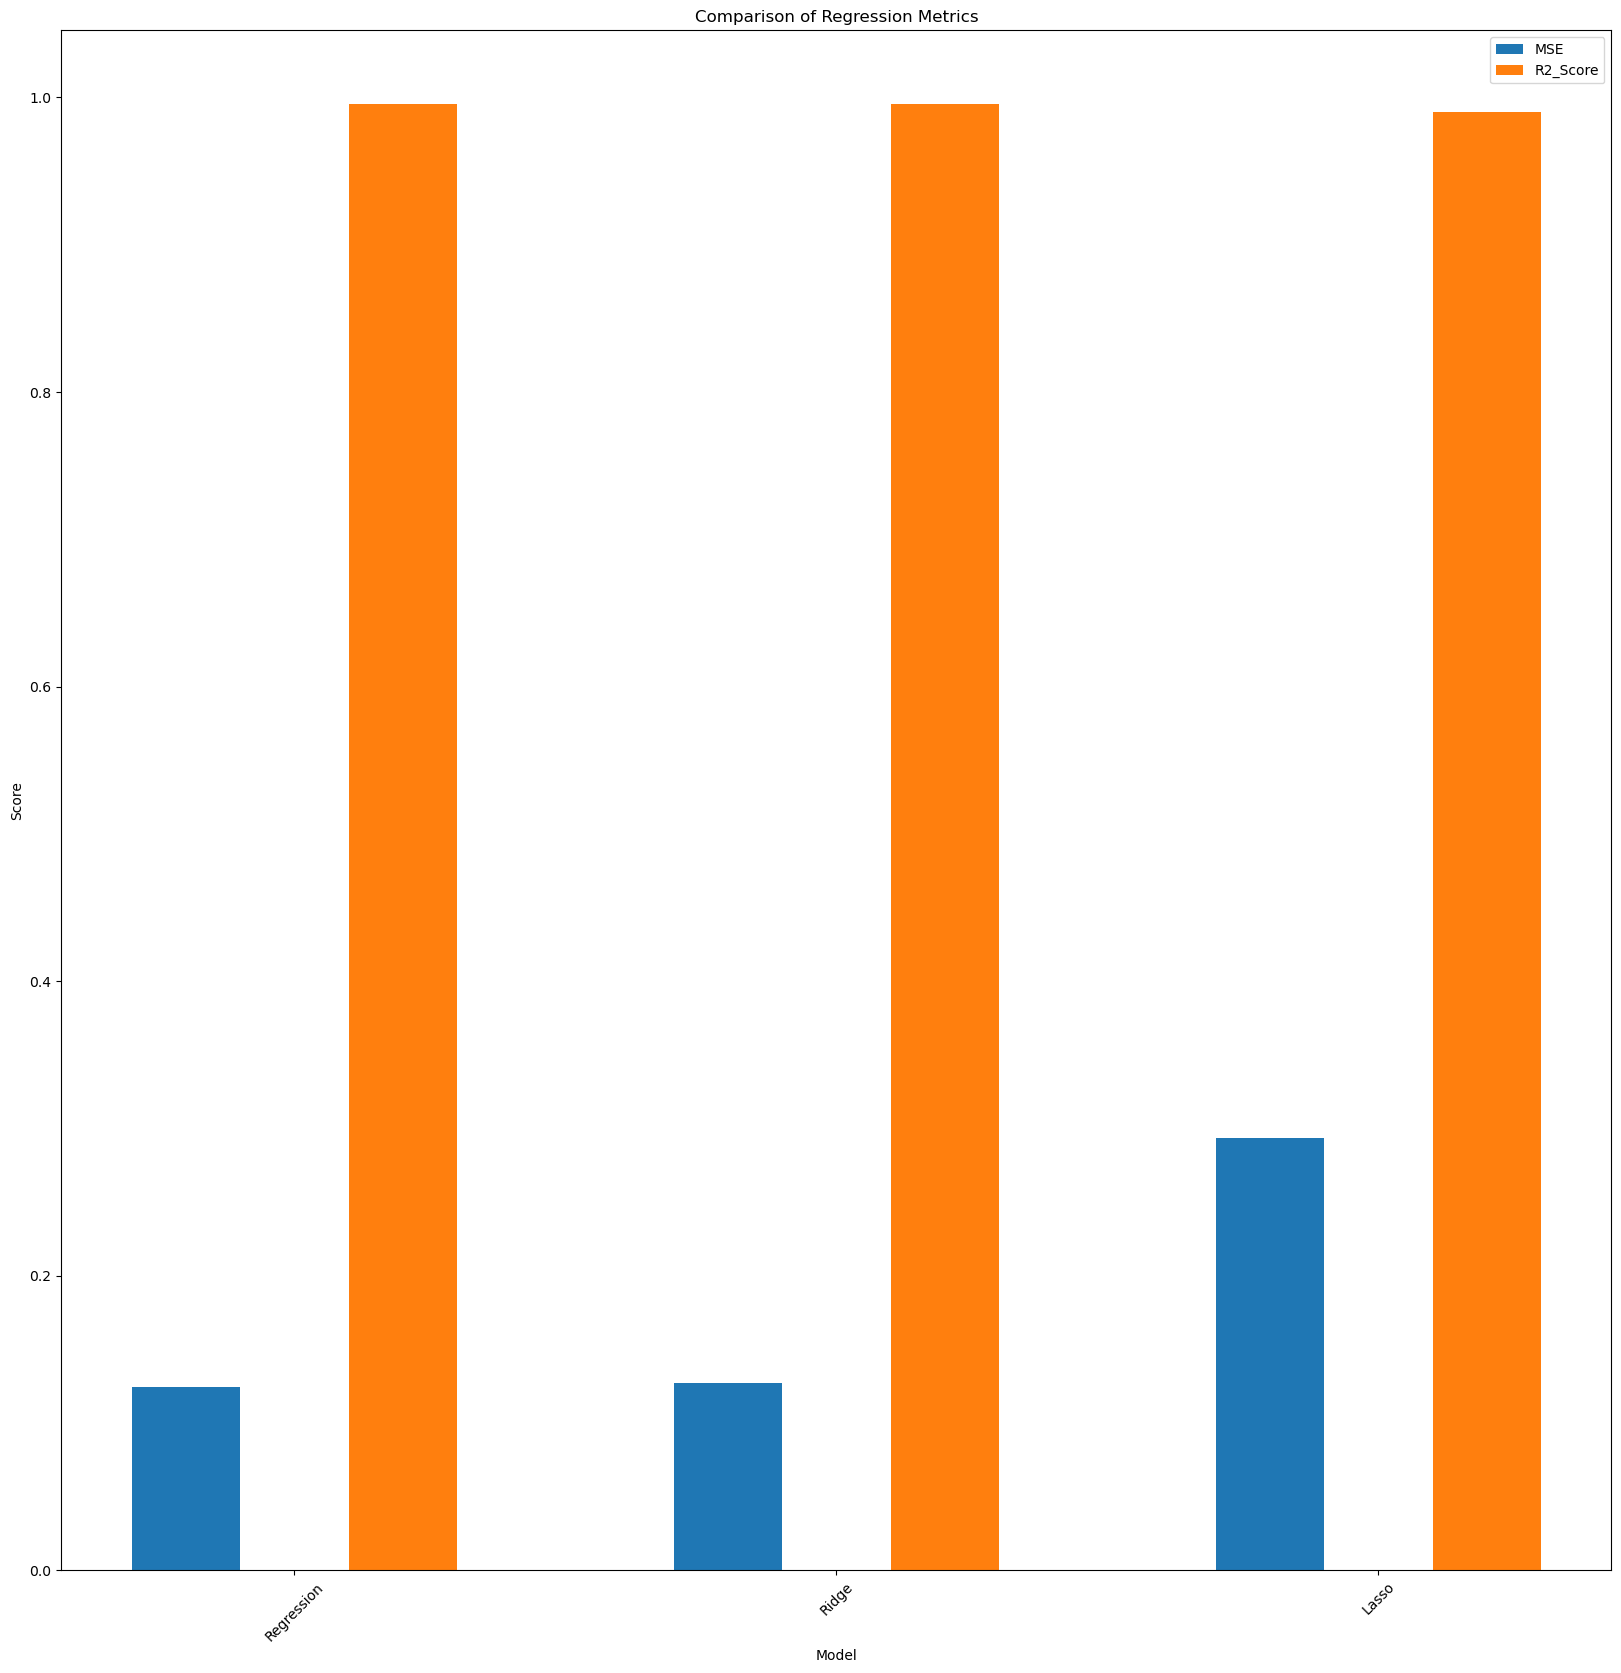

In [120]:
import matplotlib.pyplot as plt
import numpy as np
mse=results_df['Mean Squared error']
r2_score=results_df['R2 Score']

position=np.arange(len(mse))
width_bar=0.2

plt.figure(figsize=(20,20))
plt.bar(position-width_bar,mse,width=width_bar,label='MSE')
plt.bar(position+width_bar,r2_score,width=width_bar,label='R2_Score')

plt.title('Comparison of Regression Metrics')
plt.xlabel('Model')
plt.ylabel('Score')
plt.xticks(position,['Regression','Ridge','Lasso'],rotation=45)
plt.legend()
plt.show()

In [81]:
score

{'model_reg': {'Mean Squared error': 0.11428656553087789,
  'Mean Absolute error': 0.27101274719908475,
  'R2 Score': 0.9962372263986369},
 'model_ridge': {'Mean Squared error': 0.11448336320664255,
  'Mean Absolute error': 0.28634079172172344,
  'R2 Score': 0.99623074702728},
 'model_lasso': {'Mean Squared error': 0.3296947583204886,
  'Mean Absolute error': 0.4531952879677507,
  'R2 Score': 0.9891451219366552}}

In [84]:
import joblib

joblib.dump(model_reg,"weader_model_reg.pkl")
joblib.dump(model_lasso,"weader_model_lasso.pkl")
joblib.dump(model_ridge,"weader_model_ridge.pkl")
joblib.dump(scaler,"weather_scaler.pkl")

['weather_scaler.pkl']

In [87]:

import os
os.getcwd()  # prints the current folder path


'C:\\Users\\elham'

In [85]:
location_mapping = {
    "New York": 3,
    "London": 2,
    "Tokyo": 7,
    "Paris": 4,
    "Sydney": 6,
    "Dubai": 0,
    "Rome": 5,
    "Hong Kong": 1
}
def get_location_index(location_name):
    return location_mapping[location_name]


location_index = get_location_index("Tokyo") 
location_index

7

In [86]:
from flask import Flask,render_template,request
import numpy as np
import joblib
import pandas as pd

app=Flask(__name__)


# Load models
model_reg = joblib.load("weader_model_reg.pkl")
model_lasso = joblib.load("weader_model_lasso.pkl")
model_ridge = joblib.load("weader_model_ridge.pkl")

# Load scaler
scaler = joblib.load("weather_scaler.pkl")

location_mapping = {
    "New York": 3,
    "London": 2,
    "Tokyo": 7,
    "Paris": 4,
    "Sydney": 6,
    "Dubai": 0,
    "Rome": 5,
    "Hong Kong": 1
}
def get_location_index(location_name):
    return location_mapping[location_name]

@app.route("/")
def index():
    return render_template("index.html")

@app.route("/predict",methods=["POST"])   
def predict():
    humidity = float(request.form["humidity"])
    visibility = float(request.form["visibility"])
    feels_like = float(request.form["feels_like"])
    cloud_cover = float(request.form["cloud_cover"])
    location = request.form["location"]
    
    location_index=get_location_index(location)
    

    input_d = [feels_like,humidity, cloud_cover, visibility, location_index]]
    column= ['Feels Like (°C)', 'Humidity (%)', 'Cloud Cover (%)', 'Visibility (km)', 'Location_index']
      # Scale inputs
    
    # Convert to dataframe
    input_data=pd.DataFrame(input_d ,columns=column)
    scaled_data = scaler.transform(input_data)


    # Predict
    prediction = model_reg.predict(scaled_data)[0]

    return render_template("index.html", prediction=round(prediction, 2))


if __name__=="__main__":
    app.run(debug=True)


 * Serving Flask app '__main__'
 * Debug mode: on


 * Running on http://127.0.0.1:5000
Press CTRL+C to quit
 * Restarting with watchdog (windowsapi)


SystemExit: 1

C:\Users\elham\anaconda3\Lib\site-packages\IPython\core\interactiveshell.py:3534: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


In [ ]:
'Feels Like (°C)', 'Humidity (%)', 'Cloud Cover (%)', 'Visibility (km)', 'Location_index']